https://github.com/jaimezorno/Deep-Learning-for-NLP-Creating-a-Chatbot

In [1]:
import pickle
import numpy as np

In [2]:
with open('../dataset/train_qa.txt','rb') as f:
    train_data = pickle.load(f)

In [3]:
with open('../dataset/test_qa.txt','rb') as f:
    test_data = pickle.load(f)

In [4]:
train_data[10]

(['Sandra',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'moved',
  'to',
  'the',
  'office',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'office', '?'],
 'yes')

In [5]:
' '.join(train_data[10][0])

'Sandra went back to the hallway . Sandra moved to the office .'

In [6]:
' '.join(train_data[10][1])

'Is Sandra in the office ?'

In [7]:
vocab = set()
for story,question,answer in train_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [8]:
vocab.add('no')
vocab.add('yes')

In [9]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [10]:
vocab_len = len(vocab) + 1
# vocab_len = len(vocab)

In [11]:
all_data = test_data + train_data

In [12]:
all_story_lens = [len(data[0]) for data in all_data]

In [13]:
max_story_len = (max(all_story_lens))

In [14]:
max_question_len = max([len(data[1]) for data in all_data])

In [15]:
# vectorizing the data
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("qu

In [16]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [17]:
tokenizer.word_index

{'the': 1,
 'put': 2,
 'journeyed': 3,
 'daniel': 4,
 '?': 5,
 'hallway': 6,
 'moved': 7,
 'to': 8,
 '.': 9,
 'apple': 10,
 'took': 11,
 'up': 12,
 'mary': 13,
 'there': 14,
 'kitchen': 15,
 'bedroom': 16,
 'left': 17,
 'got': 18,
 'in': 19,
 'milk': 20,
 'football': 21,
 'back': 22,
 'office': 23,
 'sandra': 24,
 'went': 25,
 'down': 26,
 'garden': 27,
 'grabbed': 28,
 'travelled': 29,
 'picked': 30,
 'is': 31,
 'discarded': 32,
 'no': 33,
 'bathroom': 34,
 'dropped': 35,
 'john': 36,
 'yes': 37}

In [18]:
train_story_text = []
train_question_text = []
train_answers = []

In [19]:
for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [20]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [21]:
#Create a function for vectorizing the stories, questions and answers:
def vectorize_stories(data,word_index = tokenizer.word_index, max_story_len = max_story_len, max_question_len = max_question_len):
    #vectorized stories:
    X = []
    #vectorized questions:
    Xq = []
    #vectorized answers:
    Y = []
    
    for story, question, answer in data:
        #Getting indexes for each word in the story
        x = [word_index[word.lower()] for word in story]
        #Getting indexes for each word in the story
        xq = [word_index[word.lower()] for word in question]
        #For the answers
        y = np.zeros(len(word_index) + 1) #Index 0 Reserved when padding the sequences
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    #Now we have to pad these sequences:
    return(pad_sequences(X,maxlen=max_story_len), pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [22]:
inputs_train, questions_train, answers_train = vectorize_stories(train_data)

In [23]:
inputs_test, questions_test, answers_test = vectorize_stories(test_data)

In [24]:
inputs_train[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, 13,  7,  8,  1, 34,  9, 24,  3,  8,
        1, 16,  9])

In [25]:
train_story_text[0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [26]:
train_story_seq[0]

[13, 7, 8, 1, 34, 9, 24, 3, 8, 1, 16, 9]

In [27]:
# Building the Network
from keras.models import Sequential,Model
from keras.layers.embeddings import Embedding
from keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate,LSTM

In [28]:
# We need to create the placeholders 
#The Input function is used to create a keras tensor
#PLACEHOLDER shape = (max_story_len,batch_size)
#These are our placeholder for the inputs, ready to recieve batches of the stories and the questions
input_sequence = Input((max_story_len,)) #As we dont know batch size yet
question = Input((max_question_len,))

In [29]:
#Create input encoder M:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_len,output_dim = 64)) #From paper
input_encoder_m.add(Dropout(0.3))

#Outputs: (Samples, story_maxlen,embedding_dim) -- Gives a list of the lenght of the samples where each item has the
#lenght of the max story lenght and every word is embedded in the embbeding dimension

In [30]:
#Create input encoder C:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_len,output_dim = max_question_len)) #From paper
input_encoder_c.add(Dropout(0.3))

#Outputs: (samples, story_maxlen, max_question_len)

In [31]:
#Create question encoder:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_len,output_dim = 64,input_length=max_question_len)) #From paper
question_encoder.add(Dropout(0.3))

#Outputs: (samples, question_maxlen, embedding_dim)

In [32]:
#Now lets encode the sequences, passing the placeholders into our encoders:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [33]:
#Use dot product to compute similarity between input encoded m and question 
#Like in the paper:
match = dot([input_encoded_m,question_encoded], axes = (2,2))
match = Activation('softmax')(match)

In [34]:
#For the response we want to add this match with the ouput of input_encoded_c
response = add([match,input_encoded_c])
response = Permute((2,1))(response) #Permute Layer: permutes dimensions of input

In [35]:
#Once we have the response we can concatenate it with the question encoded:
answer = concatenate([response, question_encoded])

In [36]:
answer

<tf.Tensor 'concatenate_1/concat:0' shape=(?, 6, 220) dtype=float32>

In [37]:
# Reduce the answer tensor with a RNN (LSTM)
answer = LSTM(32)(answer)

In [38]:
#Regularization with dropout:
answer = Dropout(0.5)(answer)
#Output layer:
answer = Dense(vocab_len)(answer) #Output shape: (Samples, Vocab_size) #Yes or no and all 0s

In [39]:
#Now we need to output a probability distribution for the vocab, using softmax:
answer = Activation('softmax')(answer)

In [40]:
#Now we build the final model:
model = Model([input_sequence,question], answer)

In [41]:
model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#Categorical instead of binary cross entropy as because of the way we are training
#we could actually see any of the words from the vocab as output
#however, we should only see yes or no

In [42]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 156)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       multiple             2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
__________________________________________________________________________________________________
dot_1 (Dot

In [43]:
history = model.fit([inputs_train,questions_train],answers_train, batch_size = 32, epochs = 1000, validation_data = ([inputs_test,questions_test],answers_test))

Train on 10000 samples, validate on 1000 samples
Epoch 1/1000
10000/10000 [==============================] - 8s 769us/step - loss: 0.8634 - acc: 0.4943 - val_loss: 0.6949 - val_acc: 0.5030
Epoch 2/1000
10000/10000 [==============================] - 4s 378us/step - loss: 0.7012 - acc: 0.4959 - val_loss: 0.6937 - val_acc: 0.5030
Epoch 3/1000
10000/10000 [==============================] - 4s 376us/step - loss: 0.6959 - acc: 0.4992 - val_loss: 0.6935 - val_acc: 0.5030
Epoch 4/1000
10000/10000 [==============================] - 4s 376us/step - loss: 0.6955 - acc: 0.4940 - val_loss: 0.6932 - val_acc: 0.4720
Epoch 5/1000
10000/10000 [==============================] - 4s 380us/step - loss: 0.6948 - acc: 0.4937 - val_loss: 0.6939 - val_acc: 0.5030
Epoch 6/1000
10000/10000 [==============================] - 4s 378us/step - loss: 0.6948 - acc: 0.4975 - val_loss: 0.6932 - val_acc: 0.4910
Epoch 7/1000
10000/10000 [==============================] - 4s 375us/step - loss: 0.6944 - acc: 0.4985 - val_lo

Epoch 59/1000
10000/10000 [==============================] - 4s 383us/step - loss: 0.2739 - acc: 0.8778 - val_loss: 0.3459 - val_acc: 0.8390
Epoch 60/1000
10000/10000 [==============================] - 4s 376us/step - loss: 0.2774 - acc: 0.8799 - val_loss: 0.3537 - val_acc: 0.8360
Epoch 61/1000
10000/10000 [==============================] - 4s 382us/step - loss: 0.2777 - acc: 0.8773 - val_loss: 0.3491 - val_acc: 0.8370
Epoch 62/1000
10000/10000 [==============================] - 4s 407us/step - loss: 0.2719 - acc: 0.8838 - val_loss: 0.3661 - val_acc: 0.8430
Epoch 63/1000
10000/10000 [==============================] - 4s 399us/step - loss: 0.2689 - acc: 0.8812 - val_loss: 0.3538 - val_acc: 0.8410
Epoch 64/1000
10000/10000 [==============================] - 4s 396us/step - loss: 0.2698 - acc: 0.8793 - val_loss: 0.3572 - val_acc: 0.8390
Epoch 65/1000
10000/10000 [==============================] - 4s 390us/step - loss: 0.2663 - acc: 0.8831 - val_loss: 0.3538 - val_acc: 0.8410
Epoch 66/1000

Epoch 117/1000
10000/10000 [==============================] - 4s 376us/step - loss: 0.1037 - acc: 0.9584 - val_loss: 0.2912 - val_acc: 0.9020
Epoch 118/1000
10000/10000 [==============================] - 4s 377us/step - loss: 0.1036 - acc: 0.9613 - val_loss: 0.2569 - val_acc: 0.9020
Epoch 119/1000
10000/10000 [==============================] - 4s 380us/step - loss: 0.1003 - acc: 0.9608 - val_loss: 0.3129 - val_acc: 0.9000
Epoch 120/1000
10000/10000 [==============================] - 4s 375us/step - loss: 0.1018 - acc: 0.9597 - val_loss: 0.2947 - val_acc: 0.9050
Epoch 121/1000
10000/10000 [==============================] - 4s 378us/step - loss: 0.0975 - acc: 0.9629 - val_loss: 0.3060 - val_acc: 0.9040
Epoch 122/1000
10000/10000 [==============================] - 4s 379us/step - loss: 0.0982 - acc: 0.9625 - val_loss: 0.2641 - val_acc: 0.9110
Epoch 123/1000
10000/10000 [==============================] - 4s 376us/step - loss: 0.0889 - acc: 0.9666 - val_loss: 0.2769 - val_acc: 0.9090
Epoch 

Epoch 175/1000
10000/10000 [==============================] - 4s 381us/step - loss: 0.0446 - acc: 0.9856 - val_loss: 0.4176 - val_acc: 0.9230
Epoch 176/1000
10000/10000 [==============================] - 4s 375us/step - loss: 0.0451 - acc: 0.9866 - val_loss: 0.3798 - val_acc: 0.9190
Epoch 177/1000
10000/10000 [==============================] - 4s 371us/step - loss: 0.0407 - acc: 0.9877 - val_loss: 0.3732 - val_acc: 0.9220
Epoch 178/1000
10000/10000 [==============================] - 4s 370us/step - loss: 0.0443 - acc: 0.9867 - val_loss: 0.3484 - val_acc: 0.9190
Epoch 179/1000
10000/10000 [==============================] - 4s 368us/step - loss: 0.0501 - acc: 0.9883 - val_loss: 0.3861 - val_acc: 0.9150
Epoch 180/1000
10000/10000 [==============================] - 4s 370us/step - loss: 0.0432 - acc: 0.9873 - val_loss: 0.3677 - val_acc: 0.9220
Epoch 181/1000
10000/10000 [==============================] - 4s 373us/step - loss: 0.0447 - acc: 0.9863 - val_loss: 0.4313 - val_acc: 0.9150
Epoch 

Epoch 233/1000
10000/10000 [==============================] - 4s 374us/step - loss: 0.0385 - acc: 0.9902 - val_loss: 0.4564 - val_acc: 0.9230
Epoch 234/1000
10000/10000 [==============================] - 4s 375us/step - loss: 0.0349 - acc: 0.9909 - val_loss: 0.4386 - val_acc: 0.9290
Epoch 235/1000
10000/10000 [==============================] - 4s 370us/step - loss: 0.0261 - acc: 0.9934 - val_loss: 0.4615 - val_acc: 0.9300
Epoch 236/1000
10000/10000 [==============================] - 4s 371us/step - loss: 0.0300 - acc: 0.9924 - val_loss: 0.4265 - val_acc: 0.9240
Epoch 237/1000
10000/10000 [==============================] - 4s 370us/step - loss: 0.0280 - acc: 0.9931 - val_loss: 0.4997 - val_acc: 0.9300
Epoch 238/1000
10000/10000 [==============================] - 4s 370us/step - loss: 0.0252 - acc: 0.9931 - val_loss: 0.4562 - val_acc: 0.9360
Epoch 239/1000
10000/10000 [==============================] - 4s 372us/step - loss: 0.0325 - acc: 0.9923 - val_loss: 0.4049 - val_acc: 0.9370
Epoch 

Epoch 291/1000
10000/10000 [==============================] - 4s 385us/step - loss: 0.0305 - acc: 0.9936 - val_loss: 0.4263 - val_acc: 0.9450
Epoch 292/1000
10000/10000 [==============================] - 4s 386us/step - loss: 0.0196 - acc: 0.9945 - val_loss: 0.4890 - val_acc: 0.9440
Epoch 293/1000
10000/10000 [==============================] - 4s 370us/step - loss: 0.0276 - acc: 0.9940 - val_loss: 0.4586 - val_acc: 0.9430
Epoch 294/1000
10000/10000 [==============================] - 4s 372us/step - loss: 0.0283 - acc: 0.9929 - val_loss: 0.4574 - val_acc: 0.9420
Epoch 295/1000
10000/10000 [==============================] - 4s 369us/step - loss: 0.0260 - acc: 0.9928 - val_loss: 0.3888 - val_acc: 0.9400
Epoch 296/1000
10000/10000 [==============================] - 4s 371us/step - loss: 0.0258 - acc: 0.9933 - val_loss: 0.4241 - val_acc: 0.9400
Epoch 297/1000
10000/10000 [==============================] - 4s 378us/step - loss: 0.0271 - acc: 0.9930 - val_loss: 0.5185 - val_acc: 0.9320
Epoch 

Epoch 349/1000
10000/10000 [==============================] - 4s 370us/step - loss: 0.0231 - acc: 0.9947 - val_loss: 0.3940 - val_acc: 0.9450
Epoch 350/1000
10000/10000 [==============================] - 4s 370us/step - loss: 0.0260 - acc: 0.9945 - val_loss: 0.4491 - val_acc: 0.9460
Epoch 351/1000
10000/10000 [==============================] - 4s 371us/step - loss: 0.0334 - acc: 0.9934 - val_loss: 0.3868 - val_acc: 0.9340
Epoch 352/1000
10000/10000 [==============================] - 4s 371us/step - loss: 0.0240 - acc: 0.9939 - val_loss: 0.4257 - val_acc: 0.9480
Epoch 353/1000
10000/10000 [==============================] - 4s 372us/step - loss: 0.0308 - acc: 0.9936 - val_loss: 0.3655 - val_acc: 0.9360
Epoch 354/1000
10000/10000 [==============================] - 4s 371us/step - loss: 0.0245 - acc: 0.9941 - val_loss: 0.3727 - val_acc: 0.9430
Epoch 355/1000
10000/10000 [==============================] - 4s 370us/step - loss: 0.0191 - acc: 0.9951 - val_loss: 0.4141 - val_acc: 0.9480
Epoch 

10000/10000 [==============================] - 4s 371us/step - loss: 0.0287 - acc: 0.9945 - val_loss: 0.4014 - val_acc: 0.9490
Epoch 407/1000
10000/10000 [==============================] - 4s 373us/step - loss: 0.0252 - acc: 0.9937 - val_loss: 0.3868 - val_acc: 0.9490
Epoch 408/1000
10000/10000 [==============================] - 4s 373us/step - loss: 0.0220 - acc: 0.9958 - val_loss: 0.4067 - val_acc: 0.9500
Epoch 409/1000
10000/10000 [==============================] - 4s 379us/step - loss: 0.0273 - acc: 0.9934 - val_loss: 0.3969 - val_acc: 0.9500
Epoch 410/1000
10000/10000 [==============================] - 4s 375us/step - loss: 0.0352 - acc: 0.9933 - val_loss: 0.4128 - val_acc: 0.9490
Epoch 411/1000
10000/10000 [==============================] - 4s 394us/step - loss: 0.0281 - acc: 0.9939 - val_loss: 0.4150 - val_acc: 0.9520
Epoch 412/1000
10000/10000 [==============================] - 4s 381us/step - loss: 0.0322 - acc: 0.9947 - val_loss: 0.3472 - val_acc: 0.9540
Epoch 413/1000
10000/

Epoch 464/1000
10000/10000 [==============================] - 4s 373us/step - loss: 0.0278 - acc: 0.9945 - val_loss: 0.4224 - val_acc: 0.9560
Epoch 465/1000
10000/10000 [==============================] - 4s 380us/step - loss: 0.0296 - acc: 0.9947 - val_loss: 0.3093 - val_acc: 0.9460
Epoch 466/1000
10000/10000 [==============================] - 4s 374us/step - loss: 0.0333 - acc: 0.9944 - val_loss: 0.3222 - val_acc: 0.9490
Epoch 467/1000
10000/10000 [==============================] - 4s 375us/step - loss: 0.0290 - acc: 0.9941 - val_loss: 0.3857 - val_acc: 0.9530
Epoch 468/1000
10000/10000 [==============================] - 4s 377us/step - loss: 0.0358 - acc: 0.9937 - val_loss: 0.3638 - val_acc: 0.9440
Epoch 469/1000
10000/10000 [==============================] - 4s 376us/step - loss: 0.0264 - acc: 0.9953 - val_loss: 0.3679 - val_acc: 0.9450
Epoch 470/1000
10000/10000 [==============================] - 4s 377us/step - loss: 0.0306 - acc: 0.9948 - val_loss: 0.3887 - val_acc: 0.9440
Epoch 

10000/10000 [==============================] - 4s 376us/step - loss: 0.0330 - acc: 0.9934 - val_loss: 0.4492 - val_acc: 0.9530
Epoch 522/1000
10000/10000 [==============================] - 4s 382us/step - loss: 0.0339 - acc: 0.9943 - val_loss: 0.3631 - val_acc: 0.9490
Epoch 523/1000
10000/10000 [==============================] - 4s 388us/step - loss: 0.0370 - acc: 0.9931 - val_loss: 0.3209 - val_acc: 0.9520
Epoch 524/1000
10000/10000 [==============================] - 4s 379us/step - loss: 0.0299 - acc: 0.9942 - val_loss: 0.3708 - val_acc: 0.9440
Epoch 525/1000
10000/10000 [==============================] - 4s 376us/step - loss: 0.0229 - acc: 0.9958 - val_loss: 0.3675 - val_acc: 0.9490
Epoch 526/1000
10000/10000 [==============================] - 4s 379us/step - loss: 0.0254 - acc: 0.9945 - val_loss: 0.3417 - val_acc: 0.9600
Epoch 527/1000
10000/10000 [==============================] - 4s 375us/step - loss: 0.0295 - acc: 0.9943 - val_loss: 0.4078 - val_acc: 0.9470
Epoch 528/1000
10000/

Epoch 579/1000
10000/10000 [==============================] - 4s 373us/step - loss: 0.0281 - acc: 0.9958 - val_loss: 0.3433 - val_acc: 0.9580
Epoch 580/1000
10000/10000 [==============================] - 4s 373us/step - loss: 0.0293 - acc: 0.9935 - val_loss: 0.3467 - val_acc: 0.9540
Epoch 581/1000
10000/10000 [==============================] - 4s 383us/step - loss: 0.0227 - acc: 0.9951 - val_loss: 0.3603 - val_acc: 0.9520
Epoch 582/1000
10000/10000 [==============================] - 4s 389us/step - loss: 0.0238 - acc: 0.9950 - val_loss: 0.4450 - val_acc: 0.9530
Epoch 583/1000
10000/10000 [==============================] - 4s 391us/step - loss: 0.0376 - acc: 0.9944 - val_loss: 0.3628 - val_acc: 0.9610
Epoch 584/1000
10000/10000 [==============================] - 4s 389us/step - loss: 0.0314 - acc: 0.9947 - val_loss: 0.3774 - val_acc: 0.9490
Epoch 585/1000
10000/10000 [==============================] - 4s 381us/step - loss: 0.0291 - acc: 0.9942 - val_loss: 0.3534 - val_acc: 0.9550
Epoch 

10000/10000 [==============================] - 4s 373us/step - loss: 0.0366 - acc: 0.9935 - val_loss: 0.3573 - val_acc: 0.9540
Epoch 637/1000
10000/10000 [==============================] - 4s 376us/step - loss: 0.0363 - acc: 0.9919 - val_loss: 0.3612 - val_acc: 0.9560
Epoch 638/1000
10000/10000 [==============================] - 4s 395us/step - loss: 0.0286 - acc: 0.9953 - val_loss: 0.3003 - val_acc: 0.9590
Epoch 639/1000
10000/10000 [==============================] - 4s 376us/step - loss: 0.0323 - acc: 0.9931 - val_loss: 0.3275 - val_acc: 0.9560
Epoch 640/1000
10000/10000 [==============================] - 4s 376us/step - loss: 0.0322 - acc: 0.9940 - val_loss: 0.3666 - val_acc: 0.9420
Epoch 641/1000
10000/10000 [==============================] - 4s 374us/step - loss: 0.0305 - acc: 0.9942 - val_loss: 0.3196 - val_acc: 0.9540
Epoch 642/1000
10000/10000 [==============================] - 4s 376us/step - loss: 0.0300 - acc: 0.9943 - val_loss: 0.2542 - val_acc: 0.9540
Epoch 643/1000
10000/

Epoch 694/1000
10000/10000 [==============================] - 4s 373us/step - loss: 0.0292 - acc: 0.9941 - val_loss: 0.3774 - val_acc: 0.9540
Epoch 695/1000
10000/10000 [==============================] - 4s 373us/step - loss: 0.0322 - acc: 0.9948 - val_loss: 0.3958 - val_acc: 0.9510
Epoch 696/1000
10000/10000 [==============================] - 4s 372us/step - loss: 0.0376 - acc: 0.9935 - val_loss: 0.3697 - val_acc: 0.9500
Epoch 697/1000
10000/10000 [==============================] - 4s 373us/step - loss: 0.0290 - acc: 0.9946 - val_loss: 0.4402 - val_acc: 0.9500
Epoch 698/1000
10000/10000 [==============================] - 4s 384us/step - loss: 0.0342 - acc: 0.9925 - val_loss: 0.3568 - val_acc: 0.9560
Epoch 699/1000
10000/10000 [==============================] - 4s 378us/step - loss: 0.0300 - acc: 0.9951 - val_loss: 0.3532 - val_acc: 0.9540
Epoch 700/1000
10000/10000 [==============================] - 4s 379us/step - loss: 0.0430 - acc: 0.9925 - val_loss: 0.4189 - val_acc: 0.9550
Epoch 

10000/10000 [==============================] - 4s 373us/step - loss: 0.0416 - acc: 0.9929 - val_loss: 0.3135 - val_acc: 0.9540
Epoch 752/1000
10000/10000 [==============================] - 4s 374us/step - loss: 0.0378 - acc: 0.9930 - val_loss: 0.2920 - val_acc: 0.9480
Epoch 753/1000
10000/10000 [==============================] - 4s 374us/step - loss: 0.0371 - acc: 0.9923 - val_loss: 0.3567 - val_acc: 0.9480
Epoch 754/1000
10000/10000 [==============================] - 4s 374us/step - loss: 0.0395 - acc: 0.9923 - val_loss: 0.3473 - val_acc: 0.9510
Epoch 755/1000
10000/10000 [==============================] - 4s 373us/step - loss: 0.0292 - acc: 0.9941 - val_loss: 0.3369 - val_acc: 0.9520
Epoch 756/1000
10000/10000 [==============================] - 4s 379us/step - loss: 0.0349 - acc: 0.9931 - val_loss: 0.2934 - val_acc: 0.9550
Epoch 757/1000
10000/10000 [==============================] - 4s 389us/step - loss: 0.0293 - acc: 0.9937 - val_loss: 0.4016 - val_acc: 0.9530
Epoch 758/1000
10000/

Epoch 809/1000
10000/10000 [==============================] - 4s 376us/step - loss: 0.0394 - acc: 0.9913 - val_loss: 0.3140 - val_acc: 0.9490
Epoch 810/1000
10000/10000 [==============================] - 4s 383us/step - loss: 0.0385 - acc: 0.9939 - val_loss: 0.3380 - val_acc: 0.9580
Epoch 811/1000
10000/10000 [==============================] - 4s 376us/step - loss: 0.0383 - acc: 0.9945 - val_loss: 0.3645 - val_acc: 0.9520
Epoch 812/1000
10000/10000 [==============================] - 4s 376us/step - loss: 0.0324 - acc: 0.9940 - val_loss: 0.3256 - val_acc: 0.9540
Epoch 813/1000
10000/10000 [==============================] - 4s 379us/step - loss: 0.0456 - acc: 0.9919 - val_loss: 0.3170 - val_acc: 0.9580
Epoch 814/1000
10000/10000 [==============================] - 4s 377us/step - loss: 0.0411 - acc: 0.9932 - val_loss: 0.4066 - val_acc: 0.9520
Epoch 815/1000
10000/10000 [==============================] - 4s 374us/step - loss: 0.0361 - acc: 0.9935 - val_loss: 0.3588 - val_acc: 0.9620
Epoch 

10000/10000 [==============================] - 4s 378us/step - loss: 0.0422 - acc: 0.9932 - val_loss: 0.3321 - val_acc: 0.9510
Epoch 867/1000
10000/10000 [==============================] - 4s 376us/step - loss: 0.0394 - acc: 0.9936 - val_loss: 0.3577 - val_acc: 0.9540
Epoch 868/1000
10000/10000 [==============================] - 4s 375us/step - loss: 0.0380 - acc: 0.9931 - val_loss: 0.3838 - val_acc: 0.9550
Epoch 869/1000
10000/10000 [==============================] - 4s 378us/step - loss: 0.0494 - acc: 0.9926 - val_loss: 0.2908 - val_acc: 0.9530
Epoch 870/1000
10000/10000 [==============================] - 4s 378us/step - loss: 0.0371 - acc: 0.9932 - val_loss: 0.3530 - val_acc: 0.9500
Epoch 871/1000
10000/10000 [==============================] - 4s 385us/step - loss: 0.0359 - acc: 0.9943 - val_loss: 0.3556 - val_acc: 0.9510
Epoch 872/1000
10000/10000 [==============================] - 4s 377us/step - loss: 0.0448 - acc: 0.9932 - val_loss: 0.3084 - val_acc: 0.9550
Epoch 873/1000
10000/

Epoch 924/1000
10000/10000 [==============================] - 4s 371us/step - loss: 0.0457 - acc: 0.9920 - val_loss: 0.2734 - val_acc: 0.9540
Epoch 925/1000
10000/10000 [==============================] - 4s 375us/step - loss: 0.0388 - acc: 0.9929 - val_loss: 0.3240 - val_acc: 0.9520
Epoch 926/1000
10000/10000 [==============================] - 4s 419us/step - loss: 0.0492 - acc: 0.9925 - val_loss: 0.4145 - val_acc: 0.9510
Epoch 927/1000
10000/10000 [==============================] - 4s 378us/step - loss: 0.0453 - acc: 0.9930 - val_loss: 0.2556 - val_acc: 0.9600
Epoch 928/1000
10000/10000 [==============================] - 4s 379us/step - loss: 0.0459 - acc: 0.9929 - val_loss: 0.3218 - val_acc: 0.9620
Epoch 929/1000
10000/10000 [==============================] - 4s 420us/step - loss: 0.0429 - acc: 0.9927 - val_loss: 0.2723 - val_acc: 0.9570
Epoch 930/1000
10000/10000 [==============================] - 4s 404us/step - loss: 0.0557 - acc: 0.9912 - val_loss: 0.2986 - val_acc: 0.9510
Epoch 

10000/10000 [==============================] - 4s 379us/step - loss: 0.0305 - acc: 0.9941 - val_loss: 0.3534 - val_acc: 0.9560
Epoch 982/1000
10000/10000 [==============================] - 4s 381us/step - loss: 0.0422 - acc: 0.9927 - val_loss: 0.3177 - val_acc: 0.9570
Epoch 983/1000
10000/10000 [==============================] - 4s 385us/step - loss: 0.0491 - acc: 0.9926 - val_loss: 0.3009 - val_acc: 0.9600
Epoch 984/1000
10000/10000 [==============================] - 4s 380us/step - loss: 0.0501 - acc: 0.9931 - val_loss: 0.3347 - val_acc: 0.9600
Epoch 985/1000
10000/10000 [==============================] - 4s 396us/step - loss: 0.0436 - acc: 0.9923 - val_loss: 0.3552 - val_acc: 0.9460
Epoch 986/1000
10000/10000 [==============================] - 4s 390us/step - loss: 0.0480 - acc: 0.9925 - val_loss: 0.3314 - val_acc: 0.9560
Epoch 987/1000
10000/10000 [==============================] - 4s 422us/step - loss: 0.0497 - acc: 0.9930 - val_loss: 0.2798 - val_acc: 0.9630
Epoch 988/1000
10000/

In [44]:
filename = '../dataset/Z_chatbot_100_epochs.h5'
model.save(filename)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


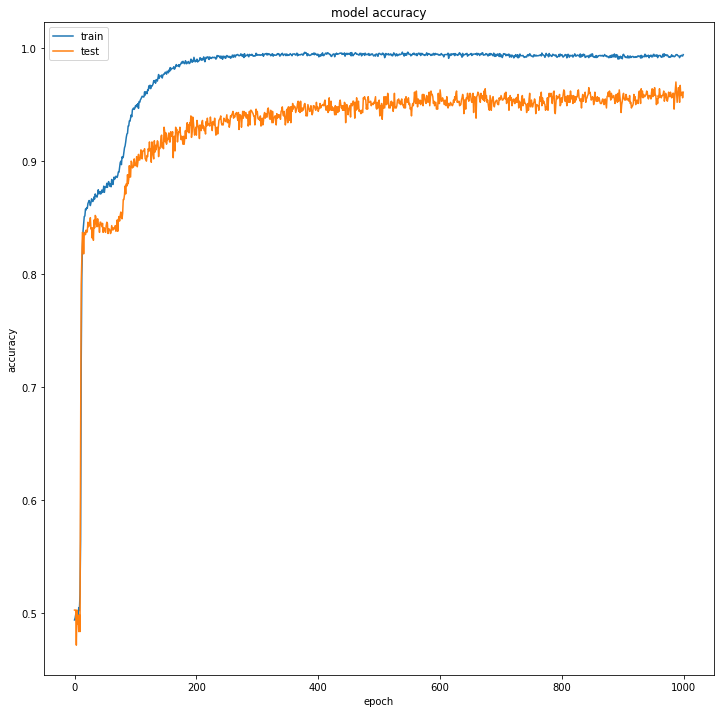

In [46]:
#Lets plot the increase of accuracy as we increase the number of training epochs
#We can see that without any training the acc is about 50%, random guessing
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.figure(figsize=(12,12))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
#To load a model that we have already trained and saved:
model.load_weights('../dataset/Z_chatbot_100_epochs.h5')

In [48]:
#Lets check out the predictions on the test set:
#These are just probabilities for every single word on the vocab
pred_results = model.predict(([inputs_test,questions_test]))

In [49]:
#First test data point
test_data[0]

(['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'John', 'in', 'the', 'kitchen', '?'],
 'no')

In [50]:
#These are the probabilities for the vocab words using the 1st sentence
pred_results[0]

array([8.2288444e-14, 8.6332336e-14, 8.9146409e-14, 7.9060585e-14,
       7.5501739e-14, 8.5093967e-14, 9.4845383e-14, 8.2923231e-14,
       8.4691267e-14, 7.0612414e-14, 8.0247725e-14, 8.1863729e-14,
       7.5649644e-14, 7.0855255e-14, 8.8028041e-14, 7.8170950e-14,
       7.1597411e-14, 8.5324746e-14, 8.6697021e-14, 8.4206439e-14,
       8.9837033e-14, 9.4251179e-14, 8.5709360e-14, 9.7819898e-14,
       7.6218688e-14, 8.7112568e-14, 6.9840753e-14, 8.2436106e-14,
       8.8672437e-14, 8.0188209e-14, 8.7820593e-14, 8.2125055e-14,
       8.4437394e-14, 1.0000000e+00, 7.6480963e-14, 8.1816430e-14,
       7.8662886e-14, 6.0389797e-11], dtype=float32)

In [51]:
val_max = np.argmax(pred_results[0])

In [52]:
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key
print(k)

no


In [53]:
#See probability:
pred_results[0][val_max]

1.0

In [54]:
#Now, we can make our own questions using the vocabulary we have
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [55]:
my_story = 'Sandra picked up the milk . Mary travelled left . '

In [56]:
my_story.split()

['Sandra',
 'picked',
 'up',
 'the',
 'milk',
 '.',
 'Mary',
 'travelled',
 'left',
 '.']

In [57]:
my_question = 'Sandra got the milk ?'

In [58]:
my_question.split()

['Sandra', 'got', 'the', 'milk', '?']

In [59]:
#Put the data in the same format as before
my_data = [(my_story.split(), my_question.split(),'yes')]

In [60]:
#Vectorize this data
my_story, my_ques, my_ans = vectorize_stories(my_data)

In [61]:
#Make the prediction
pred_results = model.predict(([my_story,my_ques]))

In [62]:
val_max = np.argmax(pred_results[0])

In [63]:
#Correct prediction!
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key
print(k)

no


In [64]:
#Confidence
pred_results[0][val_max]

0.9994875